# Tu primer árbol de decisión con scikit-learn

In [1]:
#Importamos las librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Cargamos dataset a utilizar
df_felicidad = pd.read_csv("/work/felicidad.csv", sep = ",")

In [3]:
df_felicidad
#features
#target

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


## Exploración de datos

In [4]:
#Visualizacion del DataFrame
df_felicidad.head(10)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [5]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['country', 'rank']

df_felicidad.drop(columns = columns_to_drop, axis = "columns", inplace = True)
df_felicidad

,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [6]:
#Analizamos el shape del objeto
print(df_felicidad.shape)

(155, 10)


In [7]:
#Visualizamos los tipos de datos
df_felicidad.dtypes

score         float64
high          float64
low           float64
gdp           float64
family        float64
lifexp        float64
freedom       float64
generosity    float64
corruption    float64
dystopia      float64
dtype: object

In [8]:
#Cambiamos los tipos de datos
#titanic = pd.get_dummies(titanic, columns = ["Sex"], drop_first = True)

In [9]:
df_felicidad.head()

,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
#Reemplazar el DataFrame
#titanic.rename(columns = {'Sex_male': 'Sex'}, inplace = True)

## Entrenamiento de árbol de decisión con scikit-learn

In [11]:
#Separamos en X e y
X = df_felicidad.drop("score", axis = 1)
y = df_felicidad[['score']]

In [12]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#10% para test y 90% para train
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.10, random_state = 23)

In [13]:
#Arbol de Decision


#Creacion del modelo
tree = DecisionTreeRegressor(max_depth=3, random_state = 23)

In [14]:
#Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=23)

## Evaluación del modelo

In [15]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
y_test_pred

array([5.1764167 , 5.1764167 , 4.6121667 , 5.76647823, 5.76647823,
       5.76647823, 5.1764167 , 6.79483338, 5.76647823, 5.76647823,
       5.76647823, 4.6121667 , 6.79483338, 6.79483338, 3.40833332,
       5.76647823])

In [16]:
tree.predict(np.array([5,5,5,5,5,5,5,5,5]).reshape(-1,9))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.1764167])

In [17]:
#Calculo de metricas 
#mean_squared_error

#Calculo el error cuadratico medio en Train
train_metric = mean_squared_error(y_train,y_train_pred)

#Calculo el error cuadratico medio en Test
test_metric = mean_squared_error(y_test,y_test_pred)

print('El error cuadratico medio  en train es:', train_metric)
print('El error cuadratico medio  en test es:', test_metric)

El error cuadratico medio  en train es: 0.02886973423916364
El error cuadratico medio  en test es: 0.030146392110523793


In [18]:
y_train
y_train_pred.reshape(-1,1)

array([[7.39218179],
       [5.1764167 ],
       [6.30982351],
       [4.08263636],
       [6.30982351],
       [5.1764167 ],
       [6.79483338],
       [3.40833332],
       [4.08263636],
       [5.76647823],
       [5.76647823],
       [5.1764167 ],
       [4.08263636],
       [5.1764167 ],
       [4.08263636],
       [7.39218179],
       [3.40833332],
       [5.1764167 ],
       [5.76647823],
       [4.6121667 ],
       [4.08263636],
       [5.1764167 ],
       [7.39218179],
       [4.6121667 ],
       [3.40833332],
       [7.39218179],
       [4.6121667 ],
       [6.79483338],
       [5.76647823],
       [7.39218179],
       [7.39218179],
       [4.6121667 ],
       [5.1764167 ],
       [4.6121667 ],
       [4.08263636],
       [4.6121667 ],
       [4.08263636],
       [3.40833332],
       [6.79483338],
       [5.76647823],
       [5.1764167 ],
       [5.76647823],
       [5.76647823],
       [5.76647823],
       [5.1764167 ],
       [4.6121667 ],
       [4.6121667 ],
       [4.082

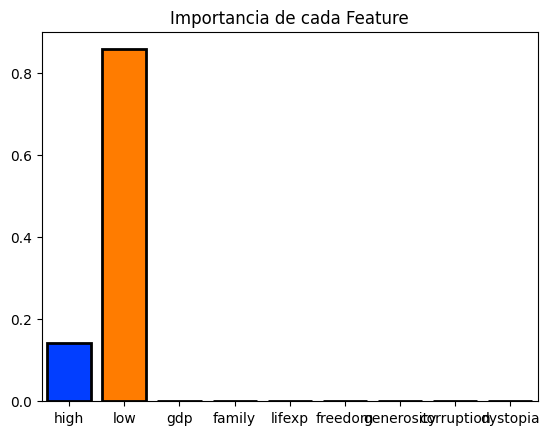

In [19]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

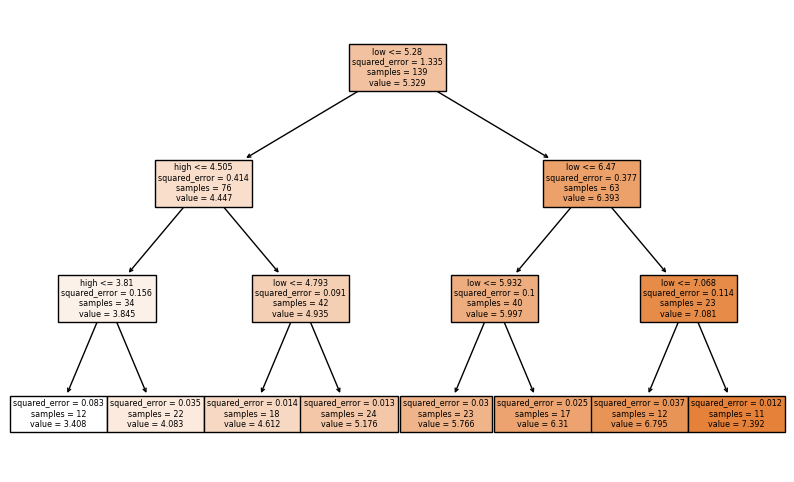

In [20]:
plt.figure(figsize=(10,6))
plot_tree(tree,feature_names=columns, filled=True)
plt.show()

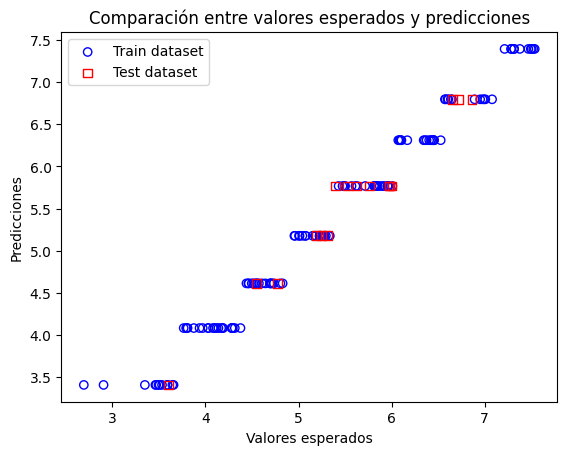

In [21]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Graficar las predicciones frente a los valores esperados
ax.scatter(y_train, y_train_pred, color='blue',marker='o', facecolors='none', label="Train dataset")
plt.scatter(y_test,y_test_pred,color='r',s=40,marker='s', facecolors='none', label="Test dataset")


# Etiquetas de los ejes
ax.set_xlabel('Valores esperados')
ax.set_ylabel('Predicciones')

# Título del gráfico
ax.set_title('Comparación entre valores esperados y predicciones')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=3, random_state=23)

rf_model.fit(X_train,y_train)

/tmp/ipykernel_443/228946322.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=3, random_state=23)

In [48]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [49]:
#Calculo de metricas 
#mean_squared_error

#Calculo el error cuadratico medio en Train
train_metric = mean_squared_error(y_train,y_train_pred_rf)

#Calculo el error cuadratico medio en Test
test_metric = mean_squared_error(y_test,y_test_pred_rf)

print('El error cuadratico medio  en train es:', train_metric)
print('El error cuadratico medio  en test es:', test_metric)
train_metric

El error cuadratico medio  en train es: 0.009372214618274368
El error cuadratico medio  en test es: 0.00988698929371856


0.009372214618274368

In [50]:
error1 

0.010006356017203417

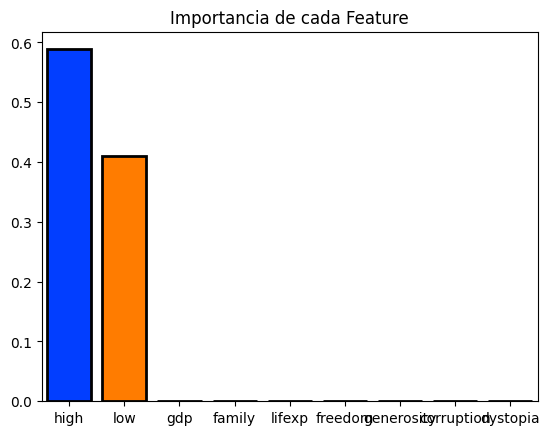

In [51]:
#Verificamos el feature importances
import seaborn as sns

importances = rf_model.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

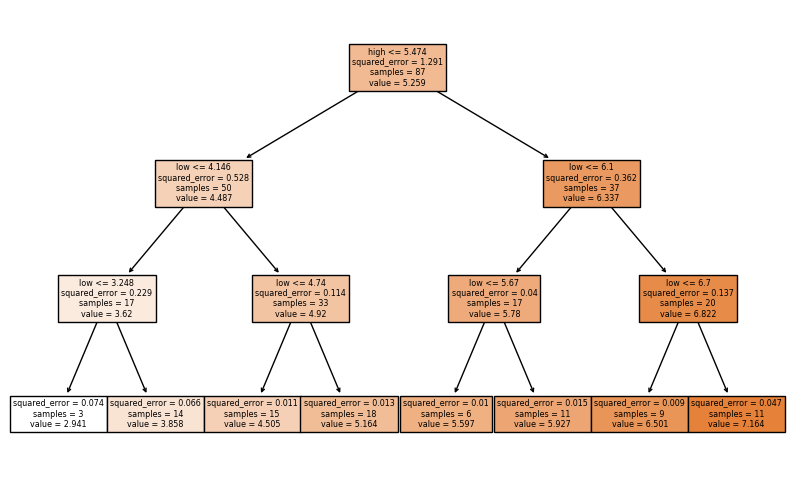

In [53]:
tree= rf_model.estimators_[99]
plt.figure(figsize=(10,6))
plot_tree(tree,feature_names=columns, filled=True)
plt.show()

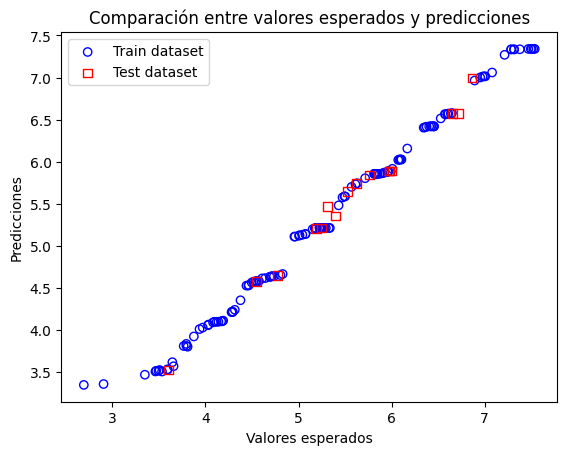

In [54]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Graficar las predicciones frente a los valores esperados
ax.scatter(y_train, y_train_pred_rf, color='blue',marker='o', facecolors='none', label="Train dataset")
plt.scatter(y_test,y_test_pred_rf,color='r',s=40,marker='s', facecolors='none', label="Test dataset")


# Etiquetas de los ejes
ax.set_xlabel('Valores esperados')
ax.set_ylabel('Predicciones')

# Título del gráfico
ax.set_title('Comparación entre valores esperados y predicciones')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>